In [1]:
# imports necesarios
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


### MNIST 

MNIST es un dataset clásico de clasificación de dígitos manuscritos (0..9). Los dígitos están representados mediante imágenes de 28x28 píxels en escala de grises. Los mejores resultados en este dataset se consiguen mediante redes neuronales convolucionales. Sin embargo nosotros vamos a emplear otro tipos de clasificadores vistos en clase. En concreto aquellos basados en árboles y distancias.

Por otro lado vamos a realizar un diseño del experimento de manera adecuada empleando conjuntos de validación para poder estimar los mejores hiperparámetros. El conjunto de datos de test sólo lo emplearemos para realizar la última clasificación y reportar resultados.

En esta primera práctica vamos a entrenar clasificadores basados en árboles de decisión sobre este dataset. 

In [2]:
mnist = fetch_openml("mnist_784")

Como siempre vamos a echar un vistazo a la descripción de este dataset

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

Los campos "data" y "target" se leen por defecto como una tabla de pandas. Dejar los datos en pandas puede tener alguna ventaja como por ejemplo que las características tienen un nombre asociado. No sería un problema continuar con llamadas a funciones sklearn con estos tipos de datos, pero si queremos aplicar alguna transformación con numpy lo ideal es convertirlos a numpy. Convertimos los datos y targets a numpy.  

In [4]:
print(mnist.data.shape)
print(mnist.target.shape)

data = mnist.data
targets = mnist.target 

print(type(data))
print(type(targets))

#-------

targets=targets.to_numpy()
targets=np.int8(targets)

data=data.to_numpy()
data=np.float32(data)

print(type(data))
print(type(targets))


(70000, 784)
(70000,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Veamos por ejemplo la imagen promedio de algunas clases:

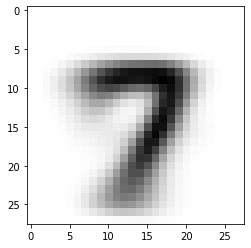

In [5]:
from matplotlib import pyplot as plt 

clase=7
m=np.mean(data[targets==clase],axis=0)
m=np.reshape(m,(28,28))

plt.imshow(m, cmap=plt.cm.gray_r, interpolation="none")

### Partición de los datos

Vamos a partir los datos en tres conjuntos: training, validation y test. Con un 80%, 10% y 10% respectivamente. 

Emplearemos el conjunto de training para aprender los parámetros del modelos, el conjunto de validation para escoger los mejores hiperparámetros. Finalmente reportaremos el resultado final sobre el conjunto de test.

### **Ejercicio 1**  

Realiza la partición de los datos en las particiones definidas (80%,10%,10%)

In [6]:
# Solución

x_train, x_test, y_train, y_test  = train_test_split(data, targets, test_size=0.1, random_state=1)

part=(7000.0)/(70000.0-7000)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=part, random_state=1) 

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(56000, 784)
(7000, 784)
(7000, 784)


### **Ejercicio 2**   

Define un clasificador de tipo árbol de decisión. Varía el parámetro "max_depth" y quédate con aquel que mejor resultado se obtenga con los datos de validación. Finalmente obten el resultado sobre los datos de test con dicho mejor parámetro. Este último clasificador con el mejor parámetro se debería entrenar con todos los datos (training+validación).

In [7]:
# Solución
max=-1
for depth in [2,4,8,16,32]: 
    dt = DecisionTreeClassifier(max_depth=depth, random_state=23)
    dt.fit(x_train, y_train)
    
    ypred = dt.predict(x_val)
    acc = accuracy_score(y_val, ypred)

    print(depth,acc)
    if acc>max: 
        max=acc
        best=depth

print("=================")
print("BEST",best,max)

2 0.3452857142857143
4 0.5564285714285714
8 0.809
16 0.8797142857142857
32 0.8775714285714286
BEST 16 0.8797142857142857


In [8]:
# Solución
dt = DecisionTreeClassifier(max_depth=best, random_state=23)

data_tr=np.concatenate((x_train,x_val),axis=0)
targets_tr=np.concatenate((y_train,y_val),axis=0)

dt.fit(data_tr,targets_tr)
    
ypred = dt.predict(x_test)
acc = accuracy_score(y_test, ypred)
print(acc)

0.8725714285714286


### **Ejercicio 3**   

Prueba otros parámetros del DecisionTreeClassifier que mejoren la tasa de acierto. En cualquier caso la selección de estos parámetros debe seguir el protocolo de experimentación antes expuesto. Esto es, escoger el mejor parámetro con datos de validación y reportar resultados con los datos de test.